# DATA SCIENCE CHALLENGE #1 - OFERTAS RELÁMPAGO

+ En conjunto con el desafío te compartimos un archivo llamado `ofertas_relampago.csv` el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado;
+ Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas;
+ El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

# Loading modules and functions

In [1]:
import pandas as pd # dataframes
import numpy as np # array manipulation
import datetime as dt # dates and times
import matplotlib.pyplot as plt # plotting
import missingno as msno # missing values
import re # regular expressions

## Loading the data

In [2]:
## loading the dataset related to this challenge
df = pd.read_csv(filepath_or_buffer = '../data/ofertas_relampago.csv')

## Overall data description

In [3]:
## information about the dataframe
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
df.info()

The dataset contains 48746 rows and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dty

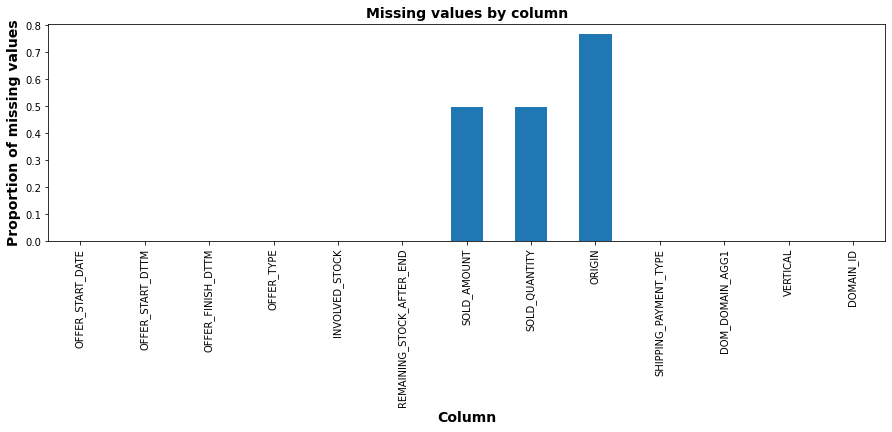

In [4]:
## percentage of null values
plt.figure(figsize = (15, 4))
(df.isna().sum(axis = 0) / df.shape[0]).plot(kind = 'bar')
plt.title(label = 'Missing values by column', fontdict = {'weight': 'bold', 'size': 14})
plt.ylabel(ylabel = 'Proportion of missing values', fontdict = {'weight': 'bold', 'size': 14})
plt.xlabel(xlabel = 'Column', fontdict = {'weight': 'bold', 'size': 14})
plt.show()

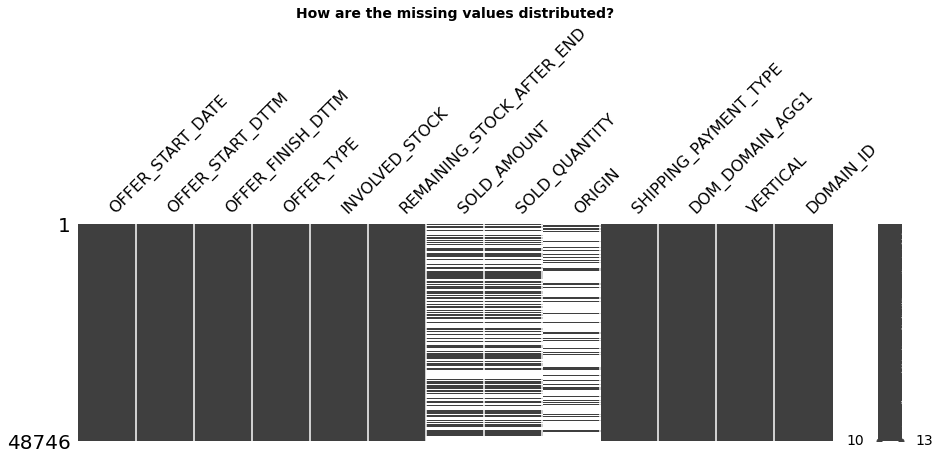

In [5]:
## position of the missing values
msno.matrix(df, figsize = (15, 4))
plt.title(label = 'How are the missing values distributed?', fontdict = {'weight': 'bold', 'size': 14})
plt.show()

 ## Feature engineering and tidying up the dataframe

In [6]:
# parsing the date columns form object to datetime columns
df['OFFER_START_DATE'] = pd.to_datetime(df.OFFER_START_DATE)
df['OFFER_START_DTTM'] = pd.to_datetime(df.OFFER_START_DTTM)
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df.OFFER_FINISH_DTTM)

## adding an indicator to flag offers that finished before starting
df['OFFER_FINISH_BEFORE_START'] = df.OFFER_FINISH_DTTM < df.OFFER_START_DTTM

## calculating the total duration of the offers in hours
df['OFFER_DURATION'] = (df.OFFER_FINISH_DTTM - df.OFFER_START_DTTM).dt.seconds / 3600

In [7]:
## replacing the missing values in the ORIGIN column by 'UNK'
df['ORIGIN'] = df.ORIGIN.fillna(value = 'UNK')

In [8]:
## adding an indicator to flag whether nothing was sold after the flash sale
df['NOTHING_SOLD'] = df.INVOLVED_STOCK == df.REMAINING_STOCK_AFTER_END
## adding an indicator to flag whether a stockout has happened
df['STOCKOUT'] = df.REMAINING_STOCK_AFTER_END < 0
## quantifying the total number of itens sold out of the available stock
df['TOTAL_SALES'] = df.INVOLVED_STOCK - df.REMAINING_STOCK_AFTER_END

In [10]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_FINISH_BEFORE_START,OFFER_DURATION,NOTHING_SOLD,STOCKOUT,TOTAL_SALES
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,False,7.045278,False,True,6
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,UNK,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,False,6.000556,True,False,0
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,UNK,none,COMPUTERS,CE,MLM-SPEAKERS,False,6.000278,False,False,3
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,UNK,none,COMPUTERS,CE,MLM-HEADPHONES,False,6.603333,False,False,2
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,UNK,none,COMPUTERS,CE,MLM-HEADPHONES,False,2.803333,False,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,UNK,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,False,6.000278,False,False,6
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,UNK,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,False,6.000278,True,False,0
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,UNK,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,False,6.000833,False,False,2
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,UNK,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,False,6.000000,False,False,4
